# Credit Score Classification using Machine Learning

***Name: Saransh Shukla  
Batch: DST 20823   
Submitted to: [Mr. Kevin Shah](https://www.linkedin.com/in/kevinshah99/)***

## Problem Statement    
#### You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task:   
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

- Age: Represents the age of the person
- Annual_Income: Represents the annual income of the person
-    Monthly_Inhand_Salary: Represents the monthly base salary of a person
 -   Num_Bank_Accounts:Represents the number of bank accounts a person holds
  -  Num_Credit_Card: Represents the number of other credit cards held by a person
-    Interest_Rate: Represents the interest rate on credit card
 -   Num_of_Loan: Represents the number of loans taken from the bank
  -  Delay_from_due_date: Represents the average number of days delayed from the payment date
   - Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
-    Changed_Credit_Limit: Represents the percentage change in credit card limit
 -   Num_Credit_Inquiries: Represents the number of credit card inquiries
  -  Credit_Mix: Represents the classification of the mix of credits
   - Outstanding_Debt: Represents the remaining debt to be paid (in USD)
-    Credit_Utilization_Ratio: Represents the utilization ratio of credit card
 -   Credit_History_Age: Represents the age of credit history of the person
  -  Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
   - Total_EMI_per_month: Represents the monthly EMI payments (in USD)
   - Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
  -  Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
   - Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

In [1]:
# Import primary necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [2]:
import warnings
warnings.filterwarnings("ignore")

Data Summary:

In [3]:
train = pd.read_csv("credit-train.csv", encoding="latin")
test = pd.read_csv("credit-test.csv", encoding="latin")
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train.describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [6]:
# features having missing values

100*train.isnull().sum()

ID                                0
Customer_ID                       0
Month                             0
Name                         998500
Age                               0
SSN                               0
Occupation                        0
Annual_Income                     0
Monthly_Inhand_Salary       1500200
Num_Bank_Accounts                 0
Num_Credit_Card                   0
Interest_Rate                     0
Num_of_Loan                       0
Type_of_Loan                1140800
Delay_from_due_date               0
Num_of_Delayed_Payment       700200
Changed_Credit_Limit              0
Num_Credit_Inquiries         196500
Credit_Mix                        0
Outstanding_Debt                  0
Credit_Utilization_Ratio          0
Credit_History_Age           903000
Payment_of_Min_Amount             0
Total_EMI_per_month               0
Amount_invested_monthly      447900
Payment_Behaviour                 0
Monthly_Balance              120000
Credit_Score                

## Data Cleaning

-    On closely observing data, the conslusion is data contains 8 consecutive months data for 12500 customers, while much information remains same for 8 months data like Name,Annual_Income, Num_Bank_Accounts, Interest_Rate,Num_of_Loan, Outstanding_Debt,some variables changes evry monthly Amount_invested_monthly, Monthly_Balance while there are some variables that dependent on previous values and increments like Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age.
 -   There are also outliers and wrong information present like Payment_Behaviour=="!@9#%8", negative values for Num_Bank_Accounts, Num_of_Loan and extremely high value for Amount_invested_monthly etc.
  -  For variables where infromation remain same throughout 8 months, we will caluate mode and replace null and wrong values with mode.
   - For variables that vary monthly, we will replace outliers and null values using the mode caluated for each customer_id.
    - For variables that increments, we will use past and future values to impute missing values using forward and backward fill.
 -   There are many variables that should be numerical type but present as object type like Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly. These variables contain mixed types some instances as int/float while others as string.
  -  ID, Customer_ID, Month, Name, SSN, Occupation, Type_of_Loan will be dropped as they are not useful for classification task.

#### Categorical Variable

In [7]:
data=train.copy()

In [8]:
#Categorical Variables
col=["Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Type_of_Loan"]

In [9]:
data["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [10]:
index=data[data["Credit_Mix"]=="_"].index
data.loc[index,"Credit_Mix"]=np.nan
df=data[-data["Credit_Mix"].isna()]
ser=df.groupby("Customer_ID")["Credit_Mix"].agg(st.mode).apply(lambda x:x[0][0])
data.drop("Credit_Mix",axis=1,inplace=True)
data=pd.merge(left=data,right=ser,how="left",left_on="Customer_ID",right_index=True)

In [11]:
data["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [12]:
index = data[data["Payment_Behaviour"] == "!@9#%8"].index
data.loc[index, "Payment_Behaviour"] = np.nan
df = data.dropna(subset=["Payment_Behaviour"])

# Use mode from the statistics module for non-numeric data
ser = df.groupby("Customer_ID")["Payment_Behaviour"].agg(st.mode)

data.drop("Payment_Behaviour", axis=1, inplace=True)
data = pd.merge(left=data, right=ser, how="left", left_on="Customer_ID", right_index=True)

In [13]:
data["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

#### Numerical Variable

In [14]:
'''Features that should be of numerical type but are present as categorical 
   variable(object type), we will convert them to numerical type.These variable
   contain mix type, for example Monthly_Balance variable contain float type for 
   index 0:98303 and string type from index 98304:99999'''

cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
      'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

for col in cols:
    data[col]=data[col].apply(lambda x: x if x is np.nan or not isinstance(x, str) 
                        else x.replace("_","")).replace("",np.nan)
    data[col]=data[col].astype(np.float64)

In [15]:
cols=["Age", "Annual_Income", "Num_Bank_Accounts","Num_Credit_Card", "Interest_Rate",
      "Num_of_Loan", "Monthly_Inhand_Salary","Changed_Credit_Limit","Outstanding_Debt",
      "Total_EMI_per_month"]

for col in cols:
    index=data[data[col]<0].index
    data.loc[index,col]=np.nan
    df=data[-data[col].isna()]
    ser = df.groupby("Customer_ID")[col].agg(st.mode).apply(lambda x: x[0][0] if isinstance(x, (list, tuple)) else x)
    data.drop(col,axis=1,inplace=True)
    data=pd.merge(left=data,right=ser,how="left",left_on="Customer_ID",right_index=True)

In [16]:
'''These features can best imputed by same feature values present in customer record for 
   different month,therefore we will use that customer record for imputating missing
   value using ffill and bfill'''

inter=data["Credit_History_Age"].str.split(" ")
data["Credit_History_Age"]=inter.apply(lambda x:x if x is np.nan else int(x[0])*12+int(x[3]))

cols=['Num_of_Delayed_Payment', 'Num_Credit_Inquiries',"Credit_History_Age",
      "Delay_from_due_date"]
for col in cols:
    if col in ['Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        index2=data[(data[col]>=30)].index
        data.loc[index2,col]=np.nan
    index1=data[(data[col]<0)].index
    data.loc[index1,col]=np.nan
    data[col]=data.groupby("Customer_ID")[col].transform(lambda x:x.ffill())
    data[col]=data.groupby("Customer_ID")[col].transform(lambda x:x.bfill())

In [17]:
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    if col in ['Amount_invested_monthly']:
        index2=data[(data[col]==10000.0)].index
        data.loc[index2,col]=np.nan
    index1=data[(data[col]<0)].index
    data.loc[index1,col]=np.nan
    ser=data.groupby("Customer_ID")[col].transform(lambda x:x.median())
    data[col].fillna(ser,inplace=True)

In [18]:
#Redundant variable will be dropped

drop=["ID", "Customer_ID", "Month","Name", "SSN", "Occupation","Type_of_Loan"]
data.drop(columns=drop,axis=1,inplace=True)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,100000.0,21.092520,14.826343,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.334050,6.271409,0.000000,9.000000,14.000000,18.000000,28.000000
Num_Credit_Inquiries,100000.0,5.773160,3.862301,0.000000,3.000000,5.000000,8.000000,29.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Credit_History_Age,100000.0,221.136220,99.680454,1.000000,144.000000,219.000000,302.000000,404.000000
Amount_invested_monthly,100000.0,193.686347,194.785222,0.000000,73.730625,129.361839,234.346249,1977.326102
Monthly_Balance,100000.0,403.492393,214.423009,0.007760,270.322511,337.270985,471.928804,1602.040519
Age,100000.0,33.274560,10.764438,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Num_Bank_Accounts,100000.0,5.369840,2.592513,0.000000,3.000000,5.000000,7.000000,10.000000


In [20]:
data.dropna(axis=0, inplace=True)

In [21]:
data.to_csv("Score.csv",index=False)

## Data Visualization

In [22]:
data=pd.read_csv("Score.csv")

In [23]:
X=data.drop("Credit_Score",axis=1)
y=data["Credit_Score"]

numeric=X.select_dtypes(exclude="object").columns
categorical=['Payment_of_Min_Amount', 'Credit_Mix']

low_cardinality=[col for col in numeric if data[col].nunique()<=30]
high_cardinality=[col for col in numeric if data[col].nunique()>30]

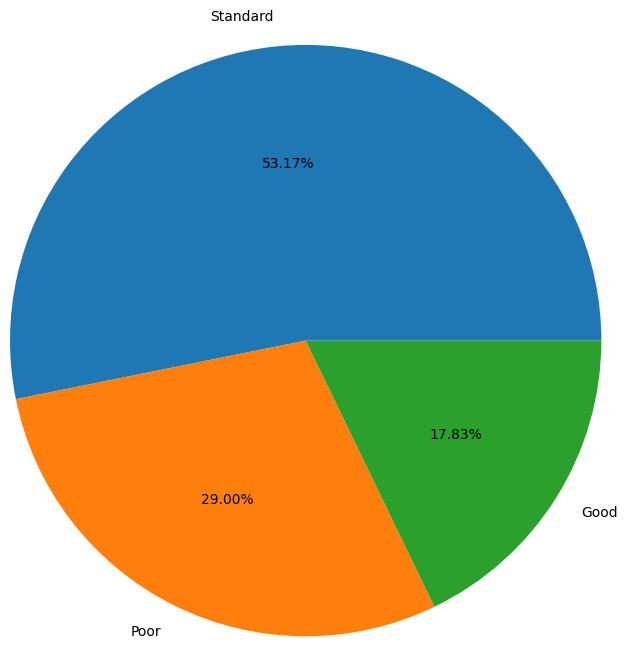

In [24]:
ser=data["Credit_Score"].value_counts()
plt.pie(x=ser.values, labels=ser.index, autopct="%0.2f%%", radius=2);
plt.savefig("output/image1.png")

**There is unequal class distribution in target variable,but the difference ratio is not very high. we will test cost-sensitive learning on the dataset.**

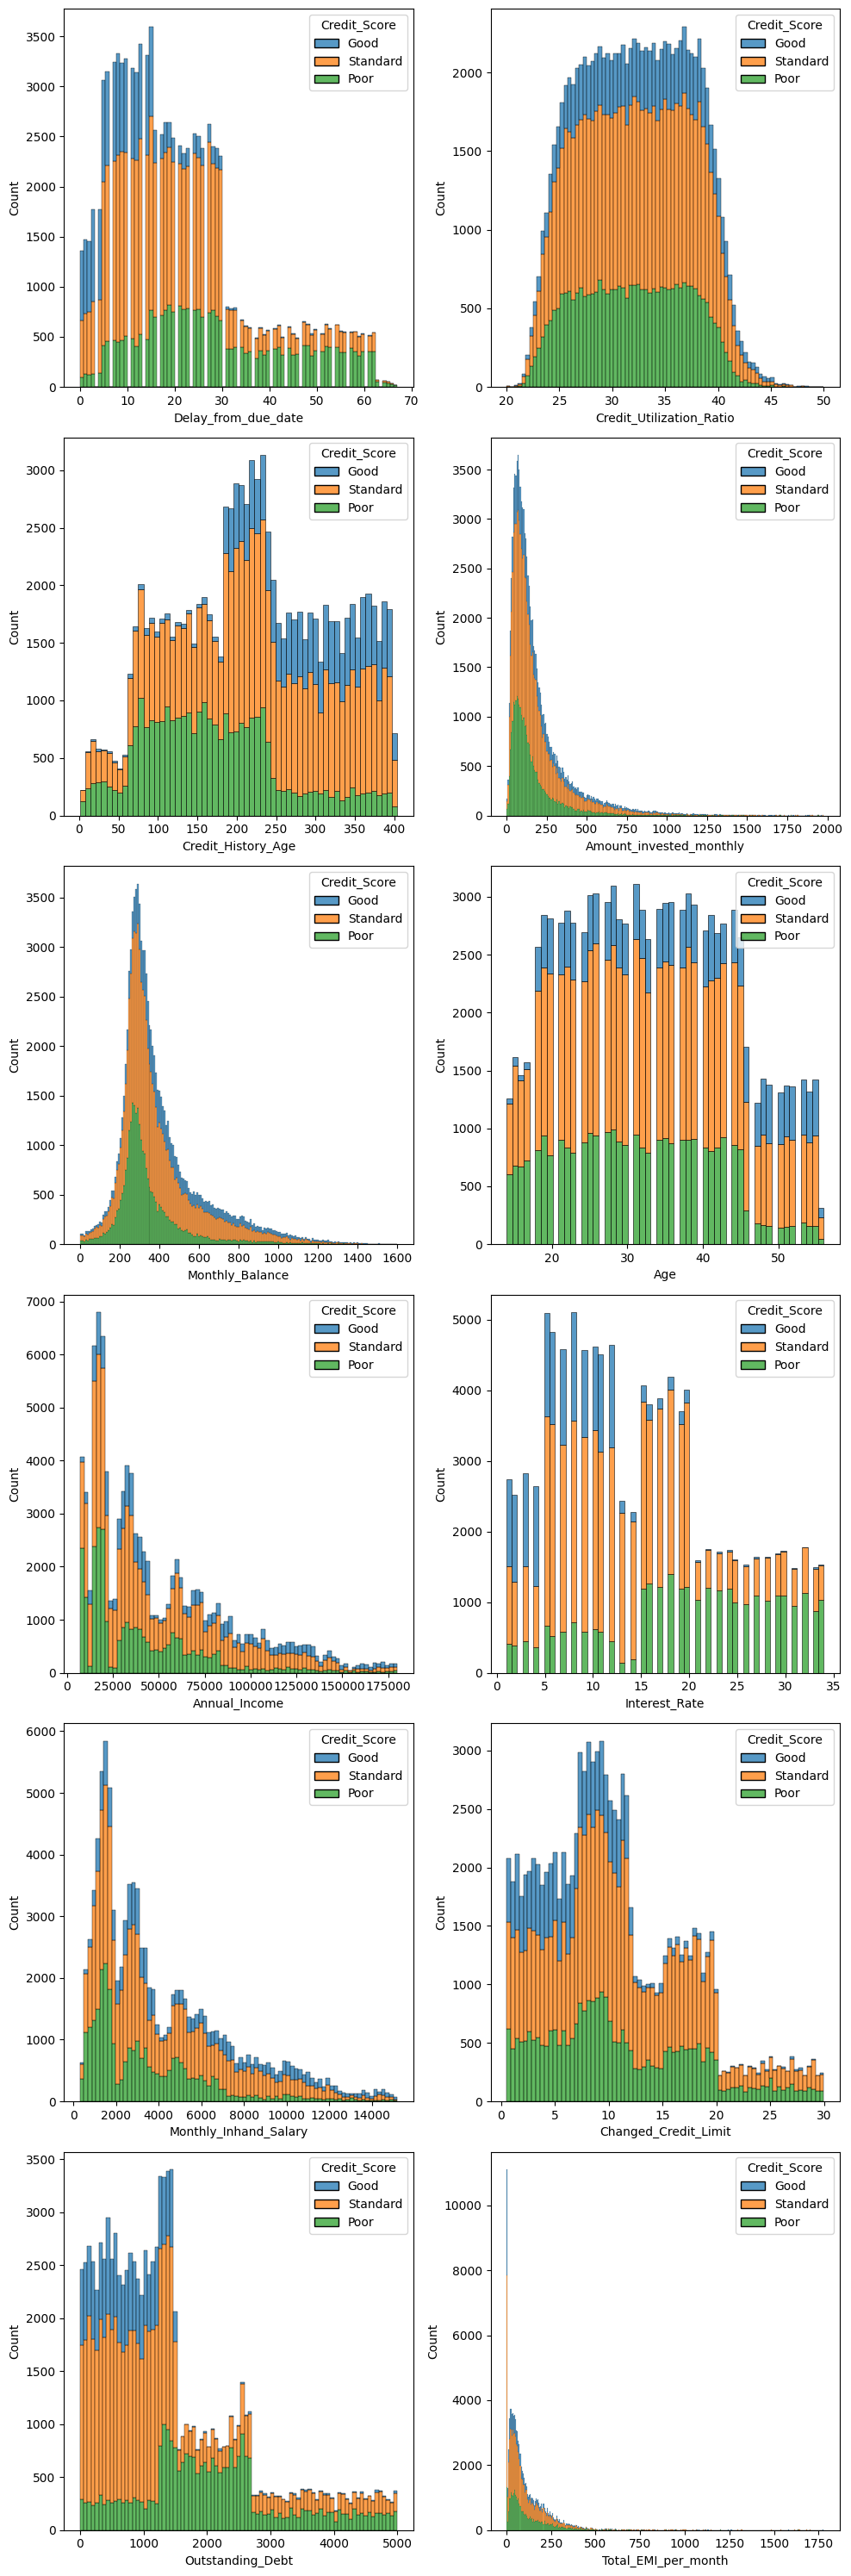

In [25]:
rows=[len(high_cardinality)//2 if len(high_cardinality)%2==0 else len(high_cardinality)//2+1]
fig,axes=plt.subplots(rows[0],2,figsize=(10,30))

ax=axes.flatten()
for i,col in enumerate(high_cardinality):
    sns.histplot(data=data,x=col,hue="Credit_Score",ax=ax[i],multiple="stack");
    
plt.tight_layout()
plt.savefig("output/image2.png")

-    Outstanding_Debt,Interest_Rate,Delay_from_due_date as these variables value increases, the proportion of Bad Credit_Score instances increases substantially, while Standard and Good Credit_Score instances proportion become meagre.
 -   On the other hand increase in Credit_History_Age, Age reults in decrease of Bad Credit_Score instances, jump in Standard and Good Credit_Score instance.
  -  Interestingly credit_utilization_ratio seems to seems to have same distribution for all categories of credit score.
   - The distribution of many features have non-gaussian distribution and largely different scales, therefore we will tranform feature variables.

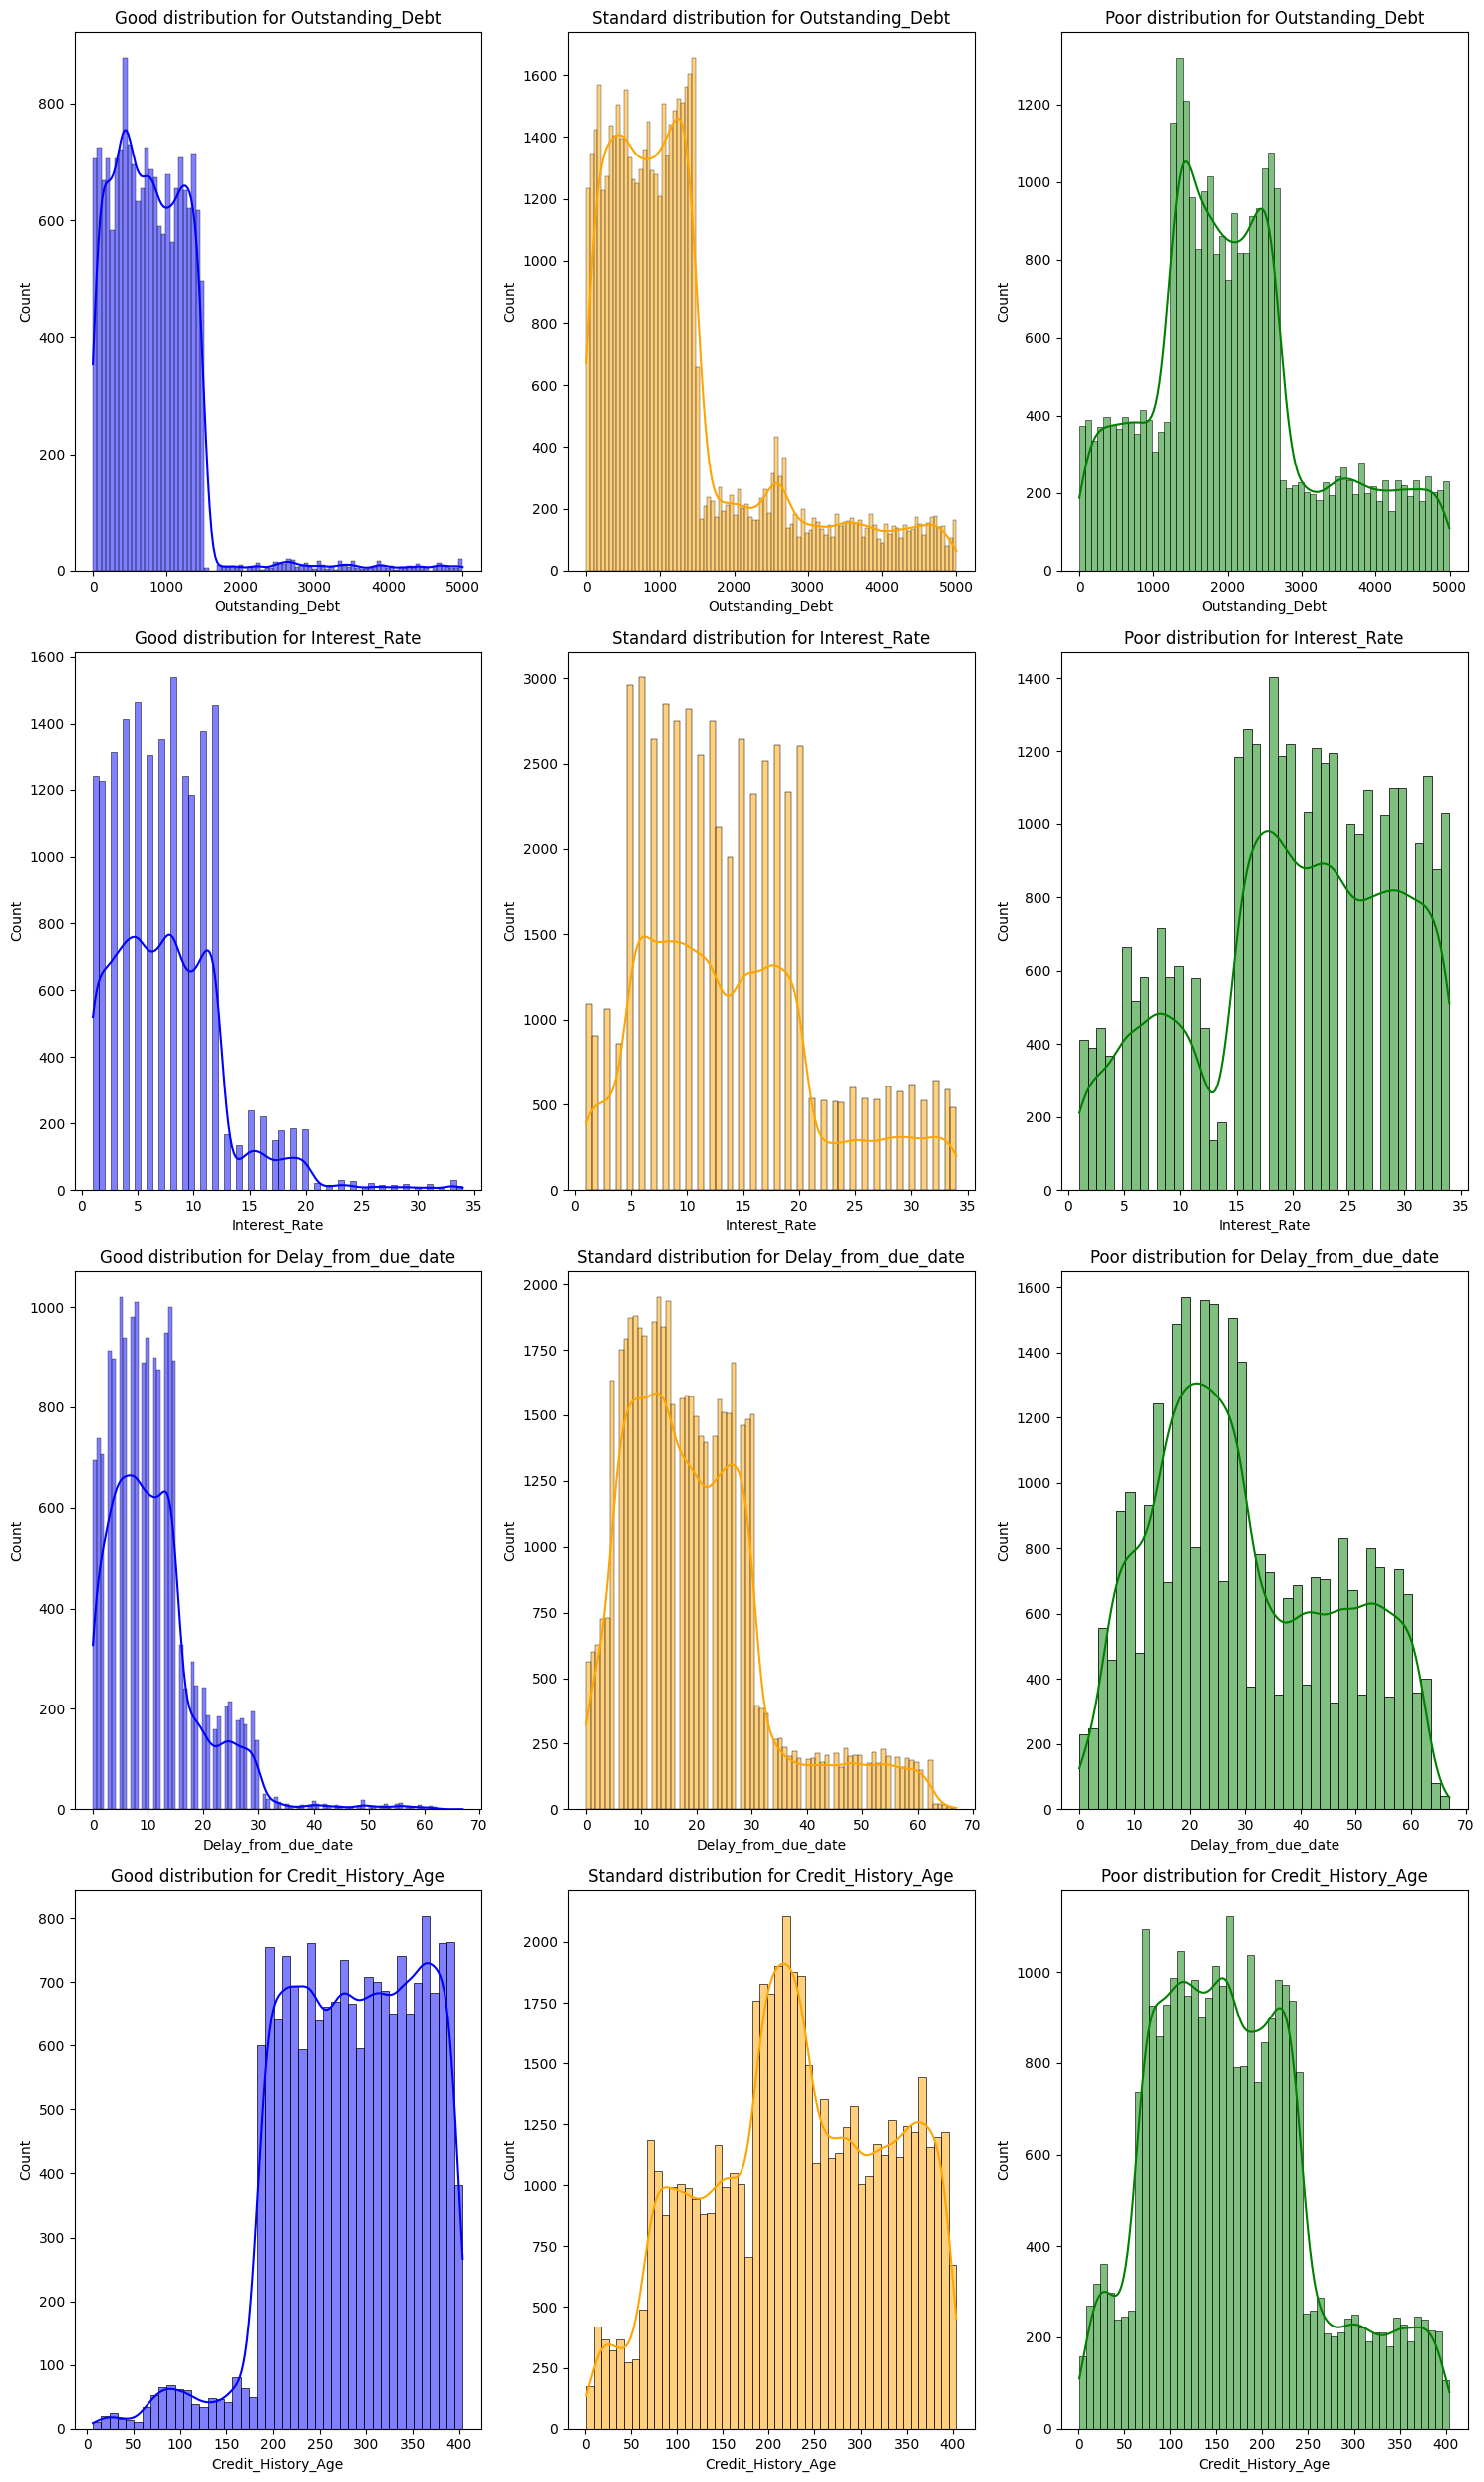

In [26]:
cols=["Outstanding_Debt", "Interest_Rate", "Delay_from_due_date", "Credit_History_Age"]
vals=["Good","Standard","Poor"]
colors=["blue","orange","green"]

fig,axes=plt.subplots(len(cols),3,figsize=(15,25))

for i,col in enumerate(cols):
    for j,(val,color) in enumerate(zip(vals,colors)):
        ax=axes[i,j]
        inter=data[data["Credit_Score"]==val]
        sns.histplot(data=inter,x=col,ax=ax,color=color,kde=True);
        ax.set_title(f"{val} distribution for {col}")
    
plt.tight_layout()
plt.savefig("output/image3.png")

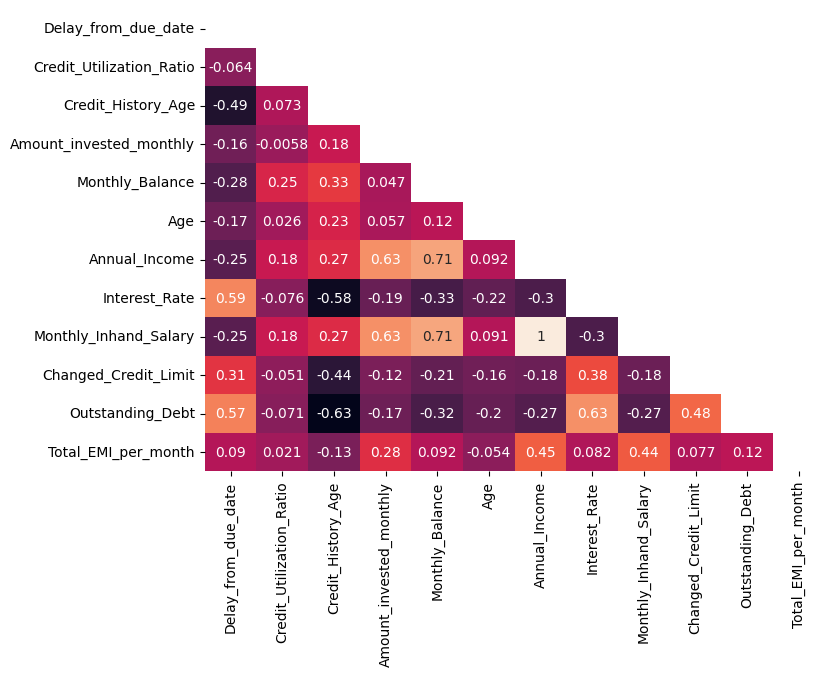

In [27]:
plt.figure(figsize=(8, 6))
arr=np.ones_like(data[high_cardinality].corr())
mask=np.triu(arr)
sns.heatmap(data[high_cardinality].corr(), cbar=False, annot=True, fmt=".2g", mask=mask);
plt.savefig("output/image4.png")

-    Many variable have strong correlation with others,for example Num_of_Delayed_Payment has strong positive correlation with interest_rate charged(0.57), outstanding_debt(0.50), delay_from_due_date (0.54), Num_Credit_Inquiries (0.50) and strong negative correlation with Credit_History_Age (-0.49) and Monthly_Inhand_Salary(-0.28).
 -   A person who has taken large sum of money at high interest rate with less salary, financial discipline and savings are more likely to have high no of delayed payments, looking for more credit to pay off loans, ending up with high interest rate and large debt.
  -  Credit_History_Age has strong negative correlation with Num_of_Delayed_Payment, Num_Credit_Inquiries, Interest_Rate, Outstanding_Debt.

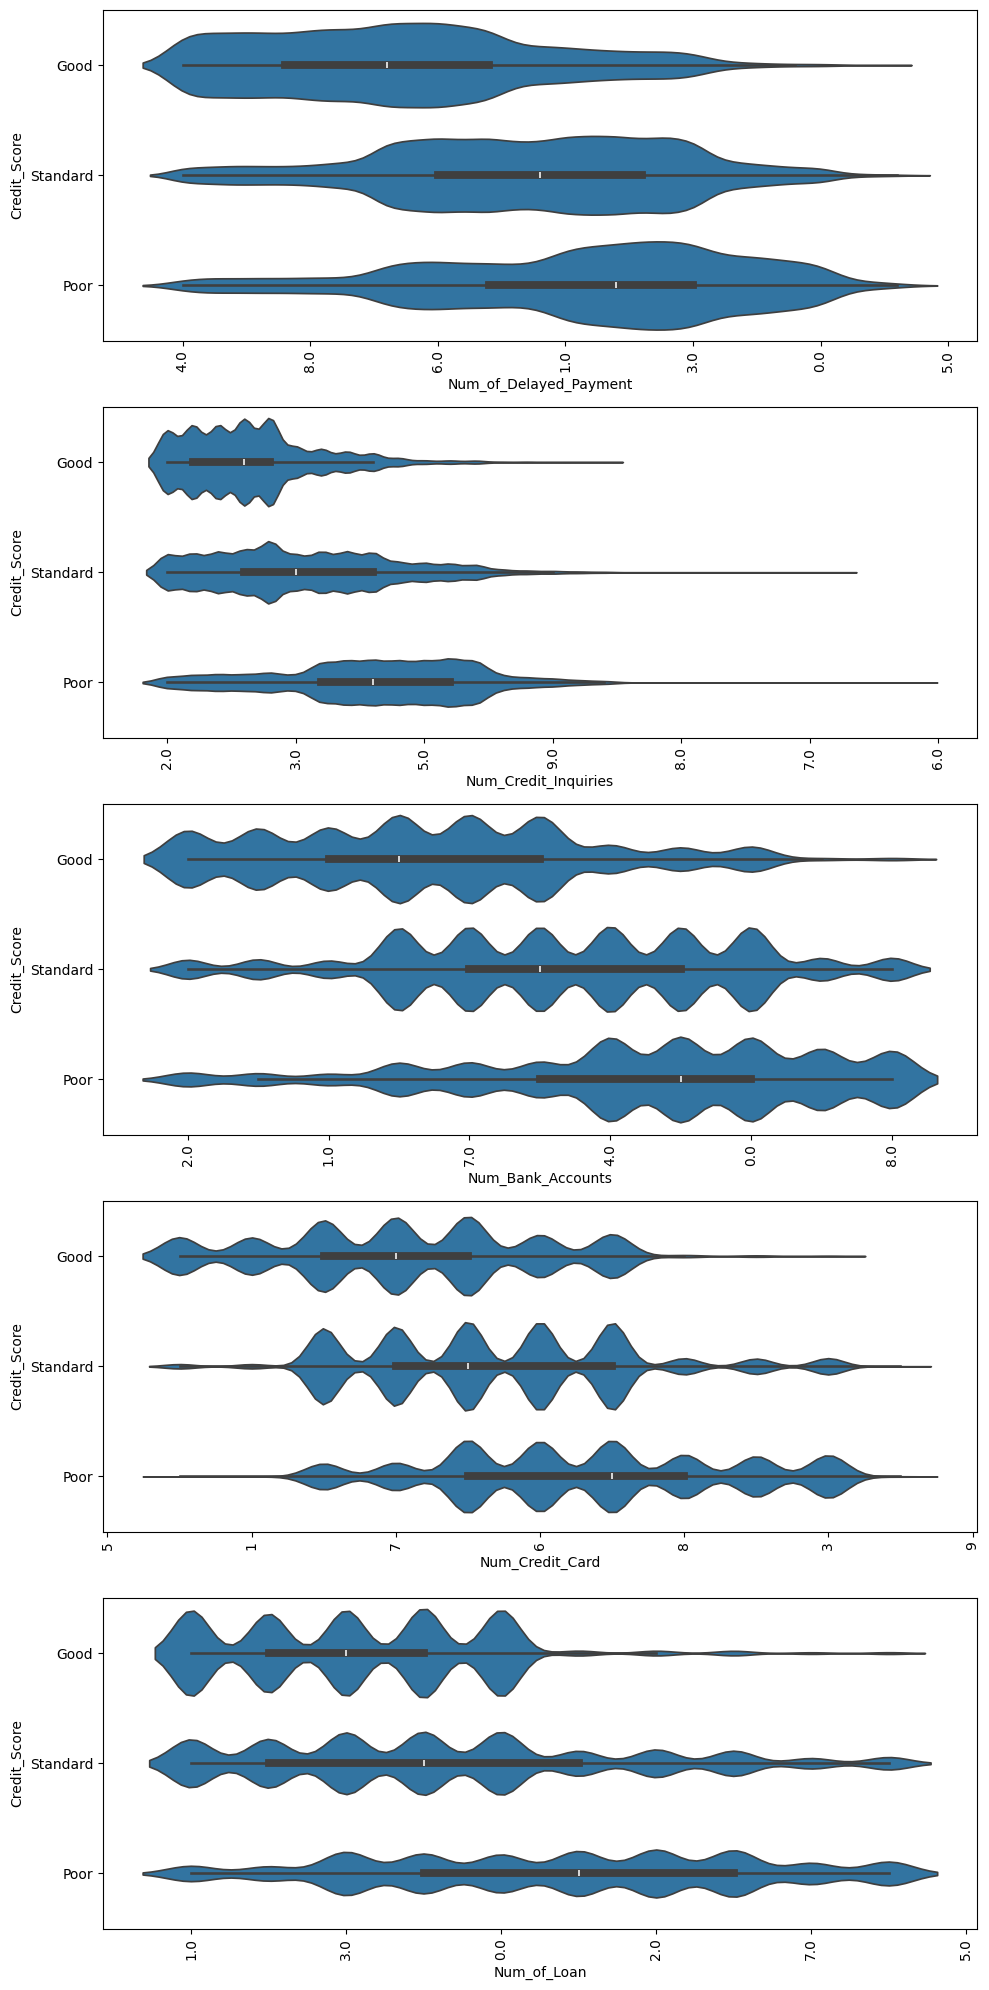

In [28]:
fig,axes=plt.subplots(5,figsize=(10,20))

for i,col in enumerate(low_cardinality):

    ax=axes[i]
    sns.violinplot(x=data[col],y=data["Credit_Score"],ax=ax);
    ax.set_xticklabels(labels=data[col].unique(),rotation=90)
    
plt.tight_layout()
plt.savefig("output/image5.png")

- As the variables Num_of_Delayed_Payment, Num_Credit_Inquiries, Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan values increases the proportion of poor credit scores increases, while good and standard credit scores instances were quite less.
- Num_of_Delayed_Payment variable having the most visible effect.

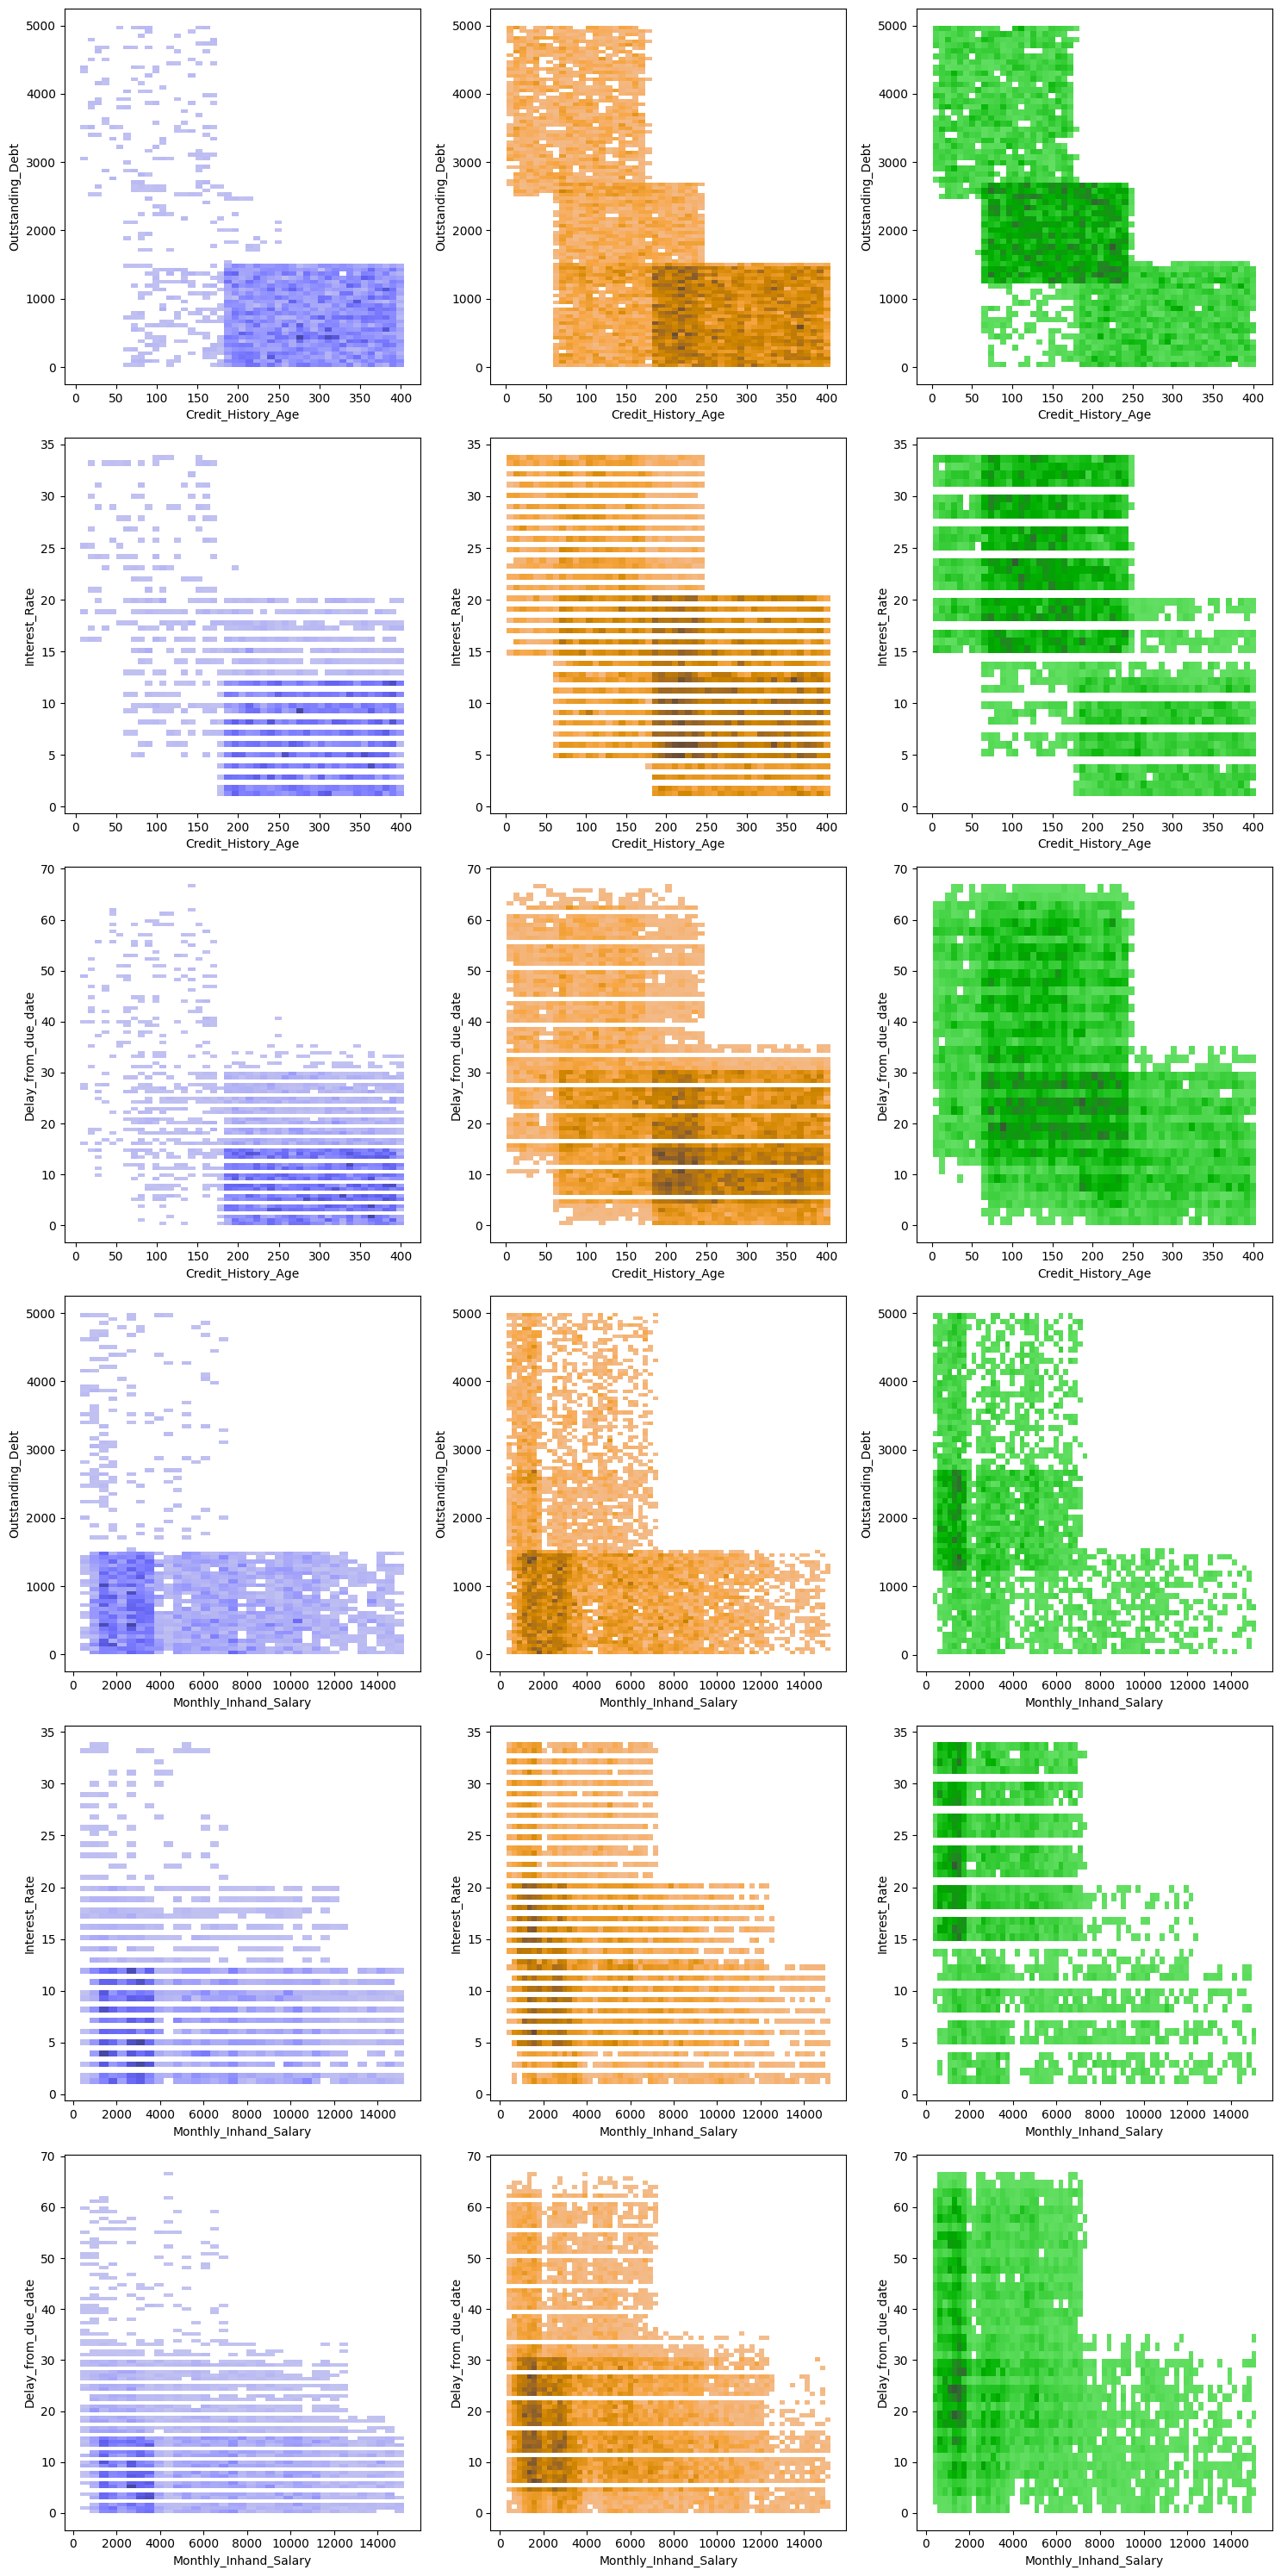

In [29]:
from itertools import product
arr1=["Credit_History_Age","Monthly_Inhand_Salary"]
arr2=["Outstanding_Debt","Interest_Rate","Delay_from_due_date"]

pairs=list(product(arr1,arr2))

fig,axes=plt.subplots(len(pairs),3,figsize=(15,30))

for i,(x,y) in enumerate(pairs):
    colors=["blue","orange","green"]
    vals=["Good","Standard","Poor"]
    for j,(color,val) in enumerate(zip(colors,vals)):
        ax=axes[i,j]
        inter=data[data["Credit_Score"]==val]
        sns.histplot(x=x,y=y,data=inter,color=color,ax=ax);
    
plt.tight_layout()
plt.savefig("output/image6.png")

- Theses charts shows density distribution of credit scores categories using bivariate analysis.
- **Overlapping instances zones are places where instances are mostly misclassified, seeing the data ensemble based learning methods will be best, while linear models will be ineffective because of presence of complex non-linear relationship.SVM will be time consuming because of large dataset size, overlapping of instances**

## Data Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [31]:
#label encoding target variable
label=LabelEncoder()
label.fit(data["Credit_Score"])
y = label.transform(data["Credit_Score"])
y

array([0, 0, 0, ..., 1, 2, 1])

In [32]:
#transforming and scaling numerical variable
scaler=StandardScaler()
scaler.fit(data[high_cardinality])
data[high_cardinality] = scaler.transform(data[high_cardinality])

In [33]:
# one hot encoding
for i in categorical:
    encoded_cols = pd.get_dummies(data[i], prefix=i, drop_first=True)
    data = pd.concat([data, encoded_cols], axis=1)
    data.drop(i, axis=1, inplace=True)

In [34]:
X = data.select_dtypes(exclude="object")
X.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_G,Credit_Mix_S
0,-1.220302,7.0,4.0,-1.067562,0.440046,-0.581521,-0.424389,-0.954496,-0.819625,3.0,...,-1.319266,4.0,-0.744786,0.13422,-0.533485,-0.444868,True,False,True,False
1,-1.220302,7.0,4.0,-0.066489,0.440046,-0.387126,-0.554343,-0.954496,-0.819625,3.0,...,-1.319266,4.0,-0.744786,0.13422,-0.533485,-0.444868,True,False,True,False
2,-1.220302,7.0,4.0,-0.718376,0.460110,-0.574928,-0.337104,-0.954496,-0.819625,3.0,...,-1.319266,4.0,-0.744786,0.13422,-0.533485,-0.444868,True,False,True,False
3,-1.085406,4.0,4.0,-0.177318,0.470142,0.029631,-0.839658,-0.954496,-0.819625,3.0,...,-1.319266,4.0,-0.744786,0.13422,-0.533485,-0.444868,True,False,True,False
4,-1.017958,4.0,4.0,-1.463366,0.480175,-0.781717,-0.289164,-0.954496,-0.819625,3.0,...,-1.319266,4.0,-0.744786,0.13422,-0.533485,-0.444868,True,False,True,False


## Feature Selection

In [35]:
features = list(X.columns)[:-1]
print("features:", features, sep="\n")

features:
['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Credit_Mix_G']


In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=7)
selector.fit(X, y)

X_new = selector.transform(X)
final_features = X.columns[selector.get_support(indices=True)].tolist()
print(final_features)

['Delay_from_due_date', 'Num_Credit_Inquiries', 'Num_Credit_Card', 'Interest_Rate', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes', 'Credit_Mix_G']


In [37]:
X = X[final_features]

### Modelling
- Oversampling the target class
- Training the model
- Result comparision

During EDA, we saw that the target variable values for the respective classes was not balanced, we will perform Oversampling and fix this.

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 53174, 2: 53174, 1: 53174})


We see all the classes under the target variable have equal weights now. We are good to start the model training.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights="distance")
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

In [43]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [44]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     42464
           1       0.91      0.95      0.93     42596
           2       0.93      0.83      0.87     42557

    accuracy                           0.91    127617
   macro avg       0.91      0.91      0.91    127617
weighted avg       0.91      0.91      0.91    127617



In [45]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10710
           1       0.80      0.84      0.82     10578
           2       0.75      0.68      0.72     10617

    accuracy                           0.80     31905
   macro avg       0.79      0.80      0.79     31905
weighted avg       0.79      0.80      0.79     31905



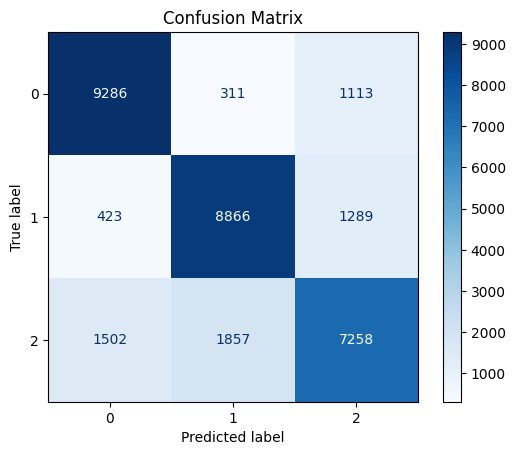

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [49]:
train_pred = nb.predict(X_train)
test_pred = nb.predict(X_test)

In [50]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74     42464
           1       0.70      0.73      0.71     42596
           2       0.69      0.46      0.55     42557

    accuracy                           0.68    127617
   macro avg       0.68      0.68      0.67    127617
weighted avg       0.68      0.68      0.67    127617



In [51]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74     10710
           1       0.70      0.73      0.71     10578
           2       0.69      0.46      0.55     10617

    accuracy                           0.68     31905
   macro avg       0.68      0.68      0.67     31905
weighted avg       0.68      0.68      0.67     31905



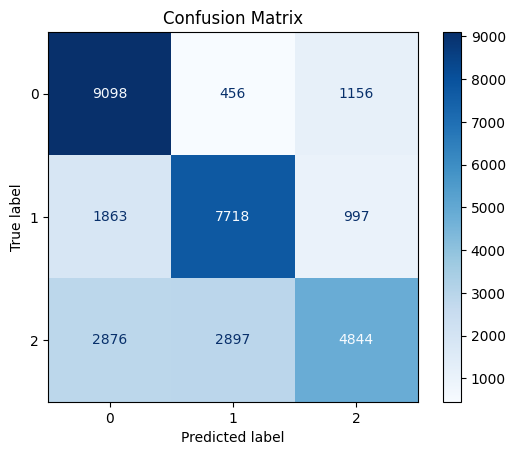

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

In [56]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     42464
           1       0.91      0.95      0.93     42596
           2       0.94      0.82      0.87     42557

    accuracy                           0.91    127617
   macro avg       0.92      0.91      0.91    127617
weighted avg       0.92      0.91      0.91    127617



In [57]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     10710
           1       0.78      0.82      0.80     10578
           2       0.78      0.69      0.73     10617

    accuracy                           0.79     31905
   macro avg       0.79      0.79      0.79     31905
weighted avg       0.79      0.79      0.79     31905



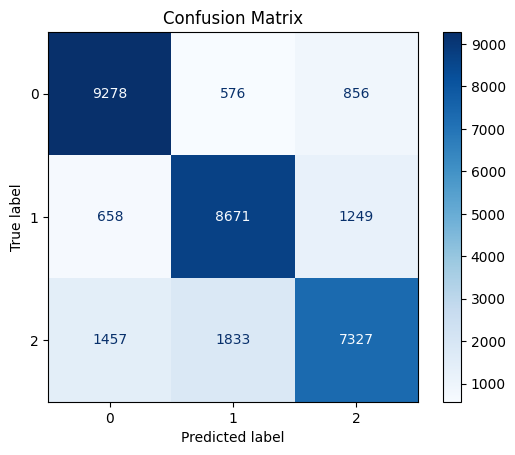

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [61]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [62]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     42464
           1       0.92      0.94      0.93     42596
           2       0.91      0.84      0.88     42557

    accuracy                           0.91    127617
   macro avg       0.91      0.91      0.91    127617
weighted avg       0.91      0.91      0.91    127617



In [63]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     10710
           1       0.82      0.84      0.83     10578
           2       0.77      0.72      0.75     10617

    accuracy                           0.81     31905
   macro avg       0.81      0.81      0.81     31905
weighted avg       0.81      0.81      0.81     31905



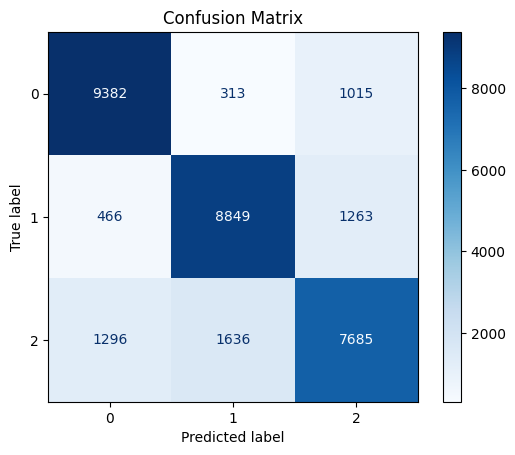

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

## Overall Performance

In [65]:
classifier_collection = {
    "Random Forest": rf,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
    "Naive Bayes": nb
}

In [66]:
accuracy_score_dict = {}
precision_score_dict = {}
recall_score_dict = {}
f1_score_dict = {}
roc_auc_dict = {}
confusion_matrix_dict = {}

In [67]:
from sklearn import metrics
count=0

for classifier_model, classifier in (classifier_collection.items()):
    count +=1
    predicted = classifier.predict(X_test)
    accuracy_score_dict[classifier_model] = {'accuracy_score' :  accuracy_score(y_test, predicted)}
    precision_score_dict[classifier_model] = {'precision_score' :  precision_score(y_test, predicted, average="weighted")}
    recall_score_dict[classifier_model] = {'recall_score' :  recall_score(y_test, predicted, average="weighted")}
    f1_score_dict[classifier_model] = {'f1_score' :  f1_score(y_test, predicted, average="weighted")}
    confusion_matrix_dict[classifier_model] = {'matrix' : confusion_matrix(y_test, predicted)}
    roc_auc_dict[classifier_model] = {'roc-auc' : roc_auc_score(y_test, classifier.predict_proba(X_test), average="weighted", multi_class="ovr")}

### Comparison of performance metrics of all the models

(0.0, 1.0)

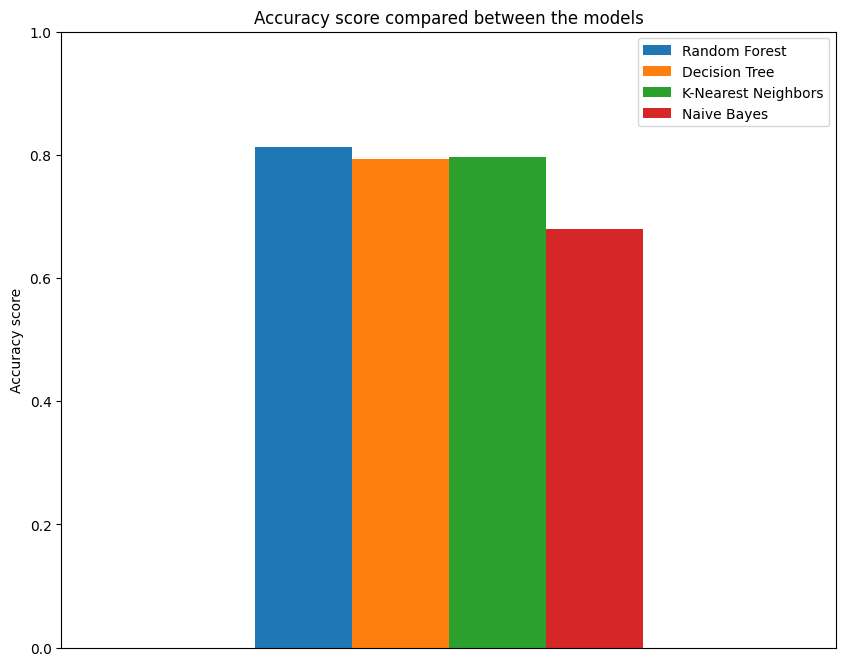

In [68]:
ax = pd.DataFrame(accuracy_score_dict).plot(kind='bar',
                                             figsize=(10,8),
                                             title="Accuracy score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Accuracy score")
ax.set_ylim(0,1)

(0.0, 1.0)

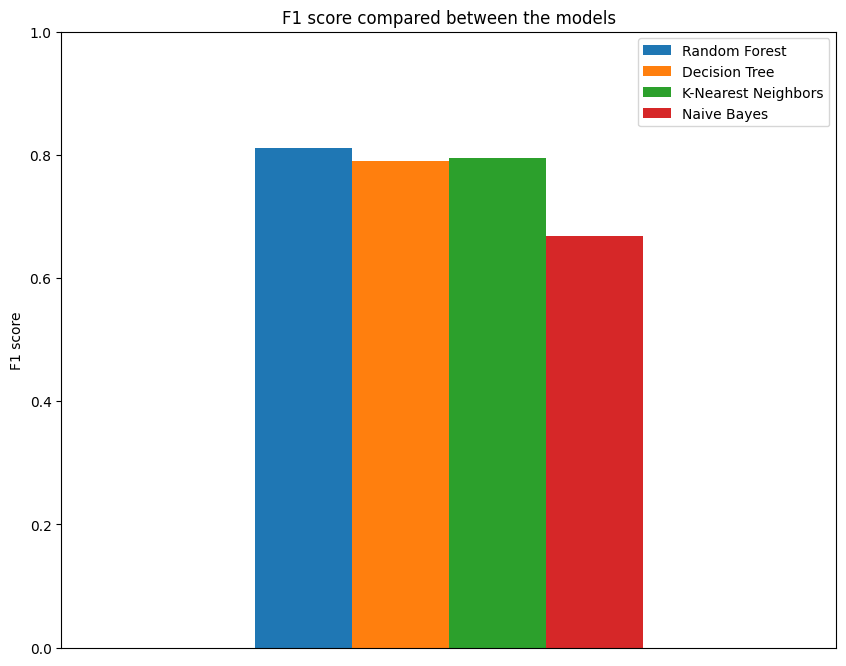

In [69]:
ax = pd.DataFrame(f1_score_dict).plot(kind='bar',
                                      figsize=(10,8),
                                      title="F1 score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("F1 score")
ax.set_ylim(0,1)

(0.0, 1.0)

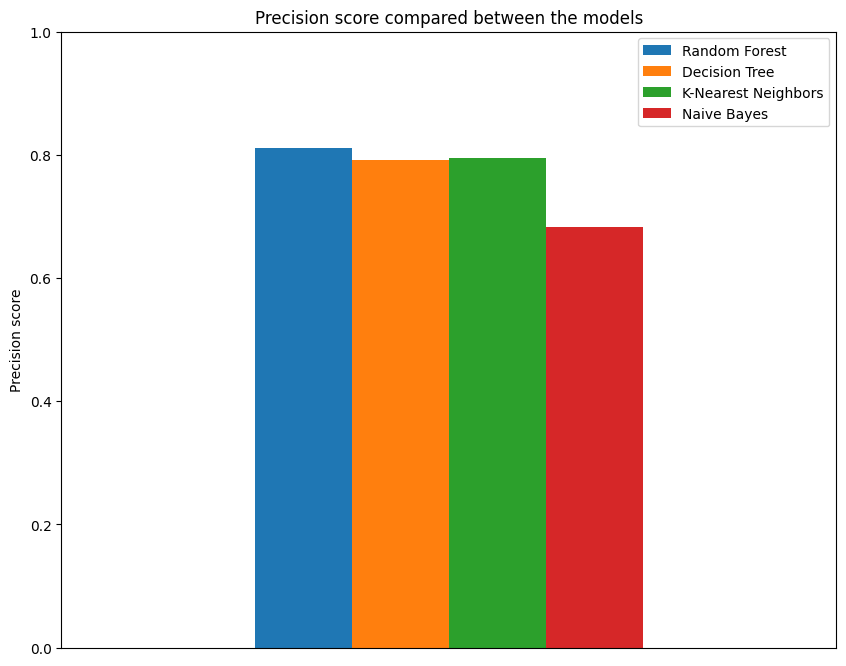

In [70]:
ax = pd.DataFrame(precision_score_dict).plot(kind='bar',
                                             figsize=(10,8),
                                             title="Precision score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Precision score")
ax.set_ylim(0,1)

(0.0, 1.0)

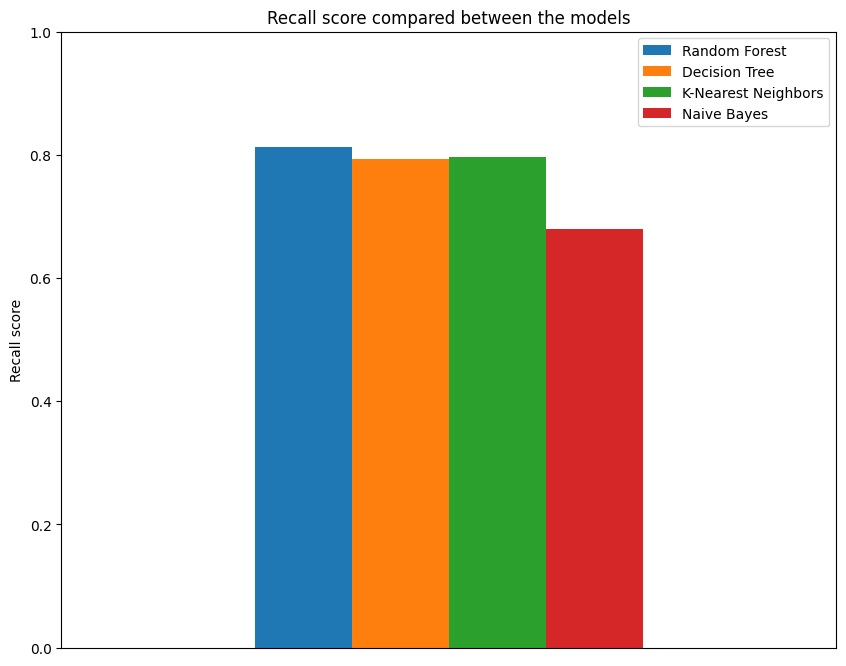

In [71]:
ax = pd.DataFrame(recall_score_dict).plot(kind='bar',
                                          figsize=(10,8),
                                          title="Recall score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Recall score")
ax.set_ylim(0,1)

(0.0, 1.0)

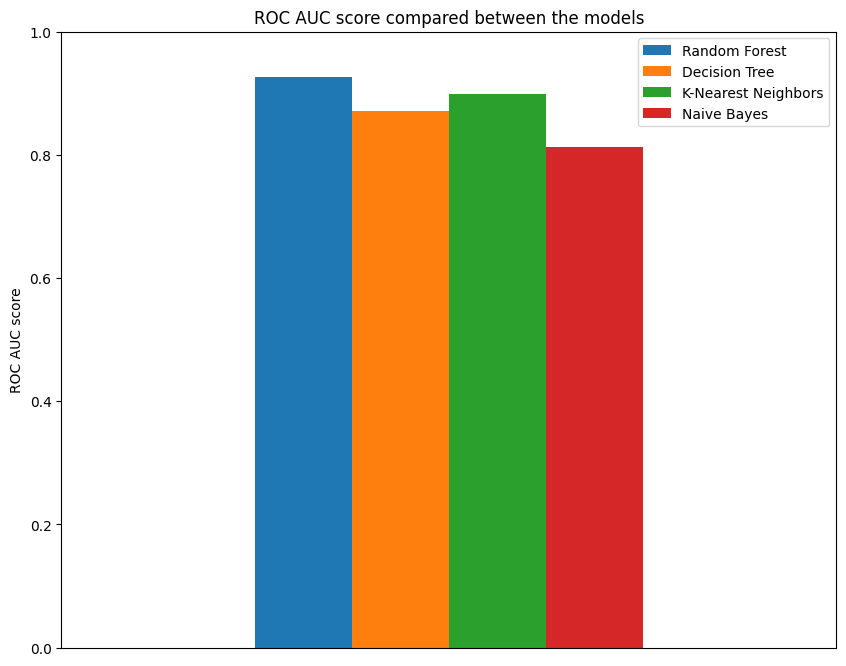

In [72]:
ax = pd.DataFrame(roc_auc_dict).plot(kind='bar',
                                     figsize=(10,8),
                                     title="ROC AUC score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("ROC AUC score")
ax.set_ylim(0,1)

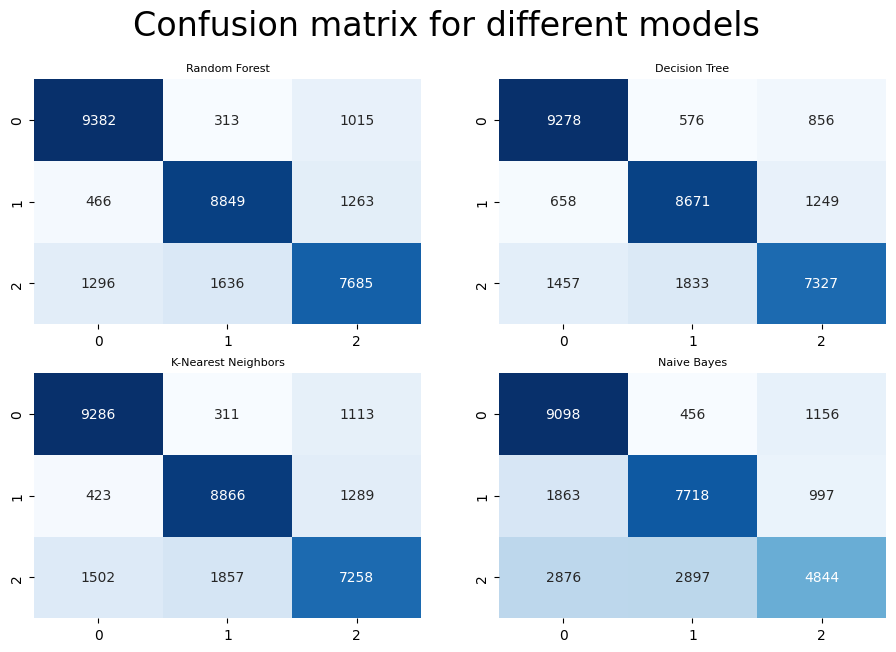

In [73]:
plt.figure(figsize=(11,7))
plt.suptitle("Confusion matrix for different models",fontsize=24)

n = 0
for classifier, class_score in confusion_matrix_dict.items():
    for item, score in class_score.items():
        n +=1
        plt.subplot(2, 2, n) 
        plt.title(classifier, fontsize=8)
        sns.heatmap(score,annot=True,cbar=False,cmap="Blues",fmt="d")

Random Forest 0.9257030363216838
Decision Tree 0.8714449510938899
K-Nearest Neighbors 0.8979975047374539
Naive Bayes 0.8122180348439928


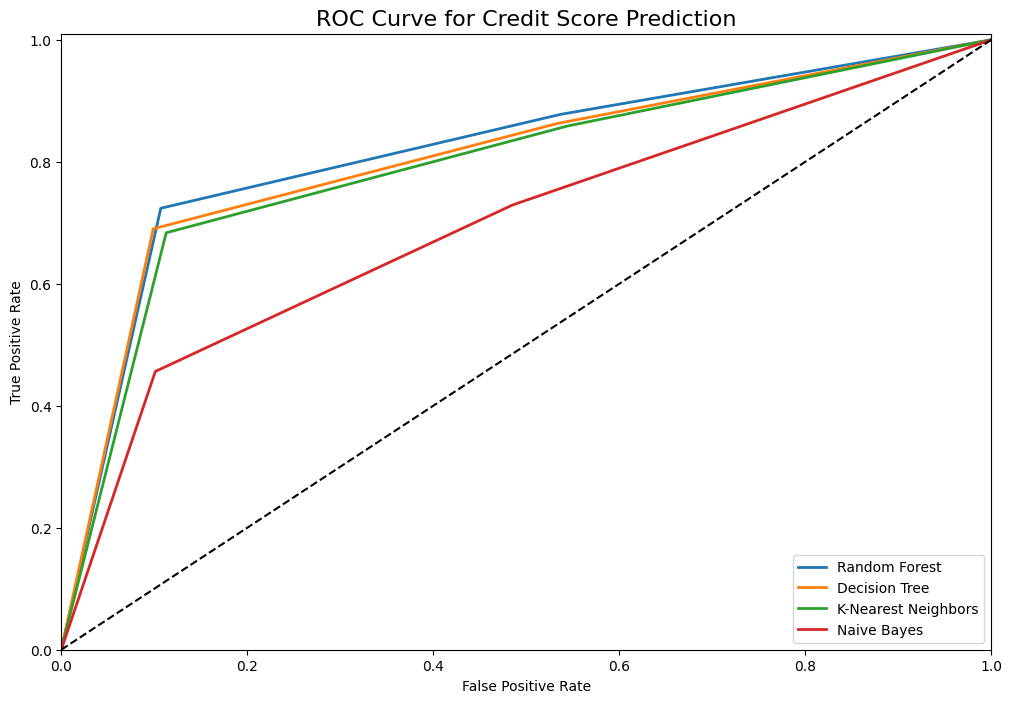

In [74]:
# generating a roc curve for each model and plot the area under the curve

from sklearn.metrics import roc_curve

plt.figure(figsize=(12,8))
for key, value in classifier_collection.items():
    model = value
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
    plt.plot(fpr, tpr, linewidth=2, label=key)
    print(key, roc_auc_score(y_test, model.predict_proba(X_test), average="weighted", multi_class="ovr"))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1.01])
plt.title("ROC Curve for Credit Score Prediction", fontsize=16)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Result

In conclusion, the model that exhibited the most superior performance was Random Forest, achieving approximately 81.46% accuracy, 81.32% precision, and an F1 score of 81.34%. 

An impressive F1 score indicates a low occurrence of both false positives and false negatives, signifying that the model is not only accurately identifying genuine threats but also is not producing many false alarms. An F1 score of 1 is deemed perfect, while a score of 0 indicates total failure. Therefore, our model's F1 score of 81.34% is a commendable result.

Interestingly, despite others models having similar performance on the training dataset, Random Forest retains most of it's performance than the other classifiers on the test dataset.